# Regression. Part 1
---
Author: Anatoliy Durkin

Updated: 24.03.2025

---
В данном ноутбуке будут рассмотрены регрессионные модели, метрики численного прогнозирования и методы подготовки признаков.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Линейная регрессия

In [46]:
df = pd.read_csv('linear_regression.csv')

In [47]:
df.head()

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    int64  
 1   y       700 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.1 KB


In [49]:
X_train, X_test, y_train, y_test = train_test_split(df[['x']], df['y'], test_size=0.2, random_state=42)

<Axes: title={'center': 'Data visualisation'}, xlabel='x', ylabel='y'>

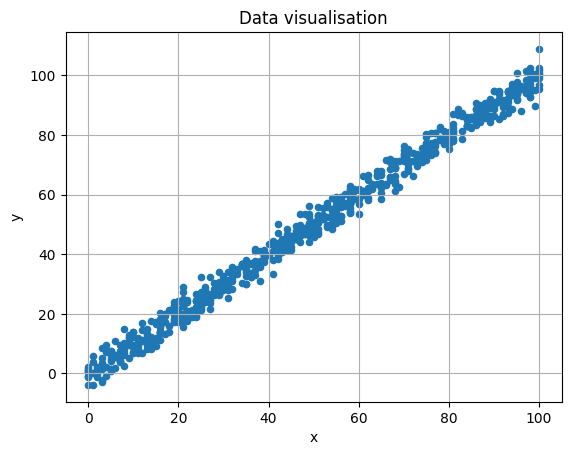

In [50]:
df.plot.scatter(x='x', y='y', xlabel='x', ylabel='y', title='Data visualisation', grid=True)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
reg = LinearRegression().fit(X_train, y_train)

In [53]:
reg.coef_

array([1.00089617])

In [54]:
reg.intercept_

np.float64(-0.14006817009450856)

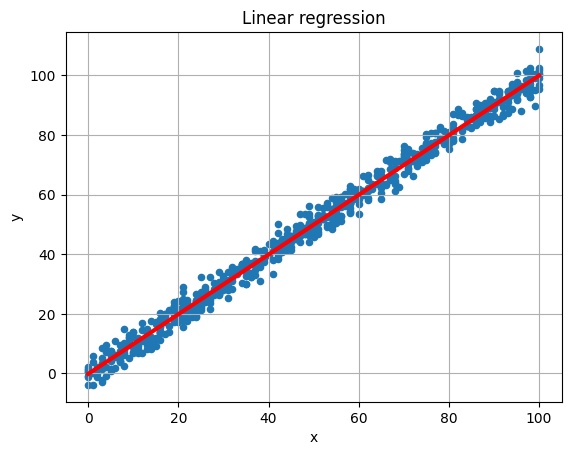

In [55]:
df.plot.scatter(x='x', y='y', xlabel='x', ylabel='y', title='Linear regression', grid=True)
plt.plot([0, 100], [0*reg.coef_[0]+reg.intercept_, 100*reg.coef_[0]+reg.intercept_], color='red', linewidth=3)

Линейная регрессия прекрасно ложится на наши данные. Посмотрим, какую оценку модели мы получаем.

In [56]:
print('Train:', reg.score(X_train, y_train))
print('Test:', reg.score(X_test, y_test))

Train: 0.990380796581592
Test: 0.9915260812752268


Однако, что это за метрика? Чаще всего в процессе обучения модели используют квадрат ошибки в функциях потерь. Возможно, эта метрика нам и показана.

MSE - mean squared error.

$$MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i-f(x_i))^2$$

Из-за возведения в квадрат не очень понятно, как интерпретировать эту метрику, поэтому зачастую берут корень из этой метрики: RMSE - root mean squared error.

In [57]:
from sklearn.metrics import mean_squared_error as MSE

In [58]:
print('MSE:', MSE(reg.predict(X_test), y_test))
print('RMSE:', MSE(reg.predict(X_test), y_test)**0.5)

MSE: 8.004011606213522
RMSE: 2.829136194355712


Метрики не похожи по значению на полученные ранее.

Поскольку MSE и RMSE никак не ограничены сверху, иногда их очень сложно интерпретировать и понимать, хорошее ли это значение. Поэтому придумана метрика, изменяющаяся от 0 до 1 - $R^2$ или коэффициент детерминации. Этот показатель отражает, какая доля вариативности зависимой переменной объясняется независимыми переменными в модели.

$$R^2 = 1 - \frac{\sum_{i=1}^{N} (y_i-f(x_i))^2}{\sum_{i=1}^{N} (y_i-\bar y)^2}$$

In [59]:
from sklearn.metrics import r2_score

In [60]:
print('R2:', r2_score(reg.predict(X_test), y_test))

R2: 0.9914583109695955


Теперь мы получили ту самую метрику. Чаще всего именно $R^2$ является очновной метрикой для регрессионных моделей. Чем ближе к единице, тем лучше. 

Хотя R-квадрат изменяется от 0 до 1, на практие можно столкнуться с тем, что эта метрика окажется отрицательной. Это свидельствует о том, что построенная модель предсказывает хуже, чем константная модель.

Какие ещё метрики можно использовать при оценке модели?

Самое простое посмотреть, на сколько мы ошибаемся в абсолютных значениях.

MAE - mean absolute error. А когда мы говорим об относительных значениях, используем MAPE - mean absolute percentage error.

In [61]:
from sklearn.metrics import mean_absolute_error as MAE, mean_absolute_percentage_error as MAPE

In [62]:
print('MAE:', MAE(reg.predict(X_test), y_test))
print('MAPE:', MAPE(reg.predict(X_test), y_test))

MAE: 2.263741325510488
MAPE: 0.2802113257816611


Какие ещё метрики вы бы могли использовать?

Например, доля предсказаний с абсолютными ошибками больше некоторого значения. Попробуйте посчитать такое значение.

In [87]:
# Вычисление абсолютных ошибок
absolute_errors = abs(reg.predict(X_test) - y_test)
threshold = 5  # Пороговое значение
# Доля ошибок, превышающих порог
error_percentage = (absolute_errors > threshold).mean() * 100
print(f"Доля предсказаний с ошибкой > {threshold}: {error_percentage:.2f}%")

Доля предсказаний с ошибкой > 5: 7.86%


# Кодирование признаков

In [64]:
df = pd.read_csv('insurance.csv')

In [65]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


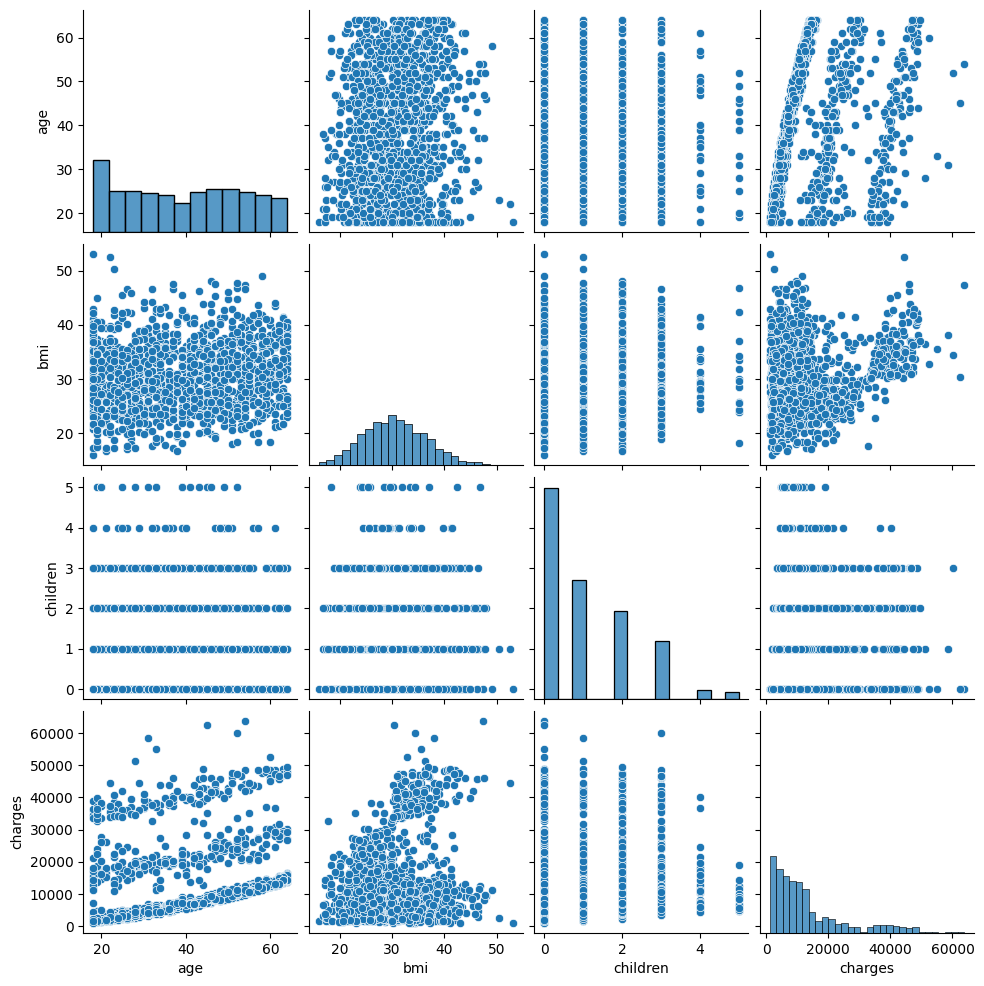

In [67]:
sns.pairplot(df)

In [68]:
# sns.heatmap(df.corr(), cmap='bwr', center=0, annot=True)

Что в данных помешает нам сразу же построить хоть какую-нибудь модель?

Строковый тип данных. Модели в основном не умеют работать с текстом, есть те, что умеют обрабатывать категориальные данные, как в нашем случае, но для остальных моделей, как и для линейной регрессии, данные должны быть численными.

У нас есть три столбца для обработки: `sex`, `smoker`, `region`. Проще всего начать со столбца `smoker`. Что представляют собой данные? Как их можно записать в числах?

In [69]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

По сути, это бинарный признак, принимающий два значения - "да" и "нет", которые также можно записать `True` и `False`, булево значение. А значит данные этого столбца можно смело заменить на нули и единицы.

In [70]:
df['smoker'] = df['smoker'].apply(lambda x: 0 if x=='no' else 1)

In [71]:
df['smoker'].unique()

array([1, 0])

Перейдём к столбцу `sex`, какие тут уникальные значения?

Уникальные значения в 'sex': ['female' 'male']


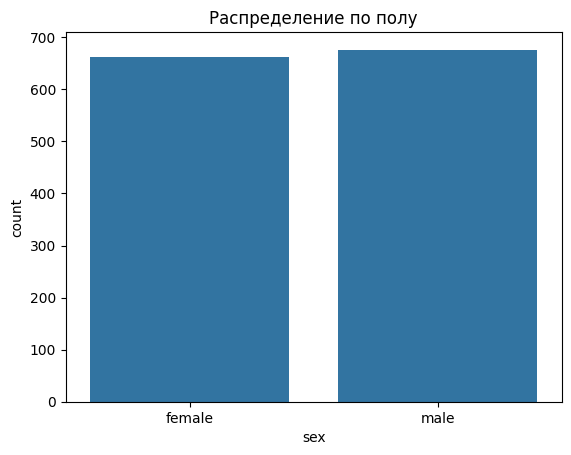

In [88]:
# Уникальные значения столбца 'sex'
print("Уникальные значения в 'sex':", df['sex'].unique())
# Визуализация распределения
sns.countplot(x='sex', data=df)
plt.title('Распределение по полу')
plt.show()

Всего два категориальных значения, но они не представимы сразу булевым типом. Что с ними можно сделать?

Да, их можно просто занумеровать нулями и единицами (главное запомнить, что есть что). Сделайте это.

In [89]:
# Замена 'female' на 0, 'male' на 1
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
# Проверка
print("Закодированные значения:", df['sex'].unique())

Закодированные значения: [0 1]


И вот мы добрались до третьего столбца, `region`, какие значения встречаются в нем?

Уникальные регионы: ['southwest' 'southeast' 'northwest' 'northeast']


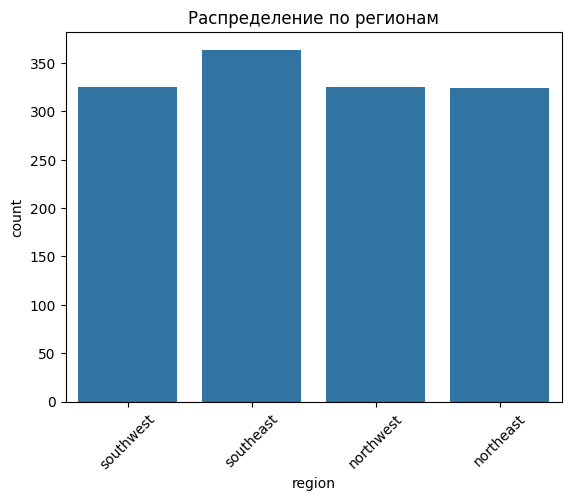

In [90]:
# Уникальные значения и их распределение
print("Уникальные регионы:", df['region'].unique())
sns.countplot(x='region', data=df)
plt.title('Распределение по регионам')
plt.xticks(rotation=45)
plt.show()

Теперь поговорим о двух методах превращения категориальных столбцов в численные - прямое кодирование и порядковое кодирование.

Техника прямого кодирования, или отображения (англ. One-Hot Encoding, OHE). Принцип действия:
- Для каждого значения признака создаётся новый столбец.
- Если объекту категория подходит, присваивается 1, если нет — 0.

для прямого кодирования в библиотеке `pandas` есть функция `get_dummies()`.

In [75]:
pd.get_dummies(df['region']).head()

,northeast,northwest,southeast,southwest
0,False,False,False,True
1,False,False,True,False
2,False,False,True,False
3,False,True,False,False
4,False,True,False,False


Когда данных много, можно угодить в ловушку фиктивных признаков, это не очень хорошо для моделей. Также она называется дамми-ловушка (англ. dummy trap, «ловушка фиктивных признаков»).

Посмотрите на полученные сверху четыре столбца. Один из них можно смело удалять, ведь его легко восстановить из оставшихся, он избыточен. Для этого у функции `get_dummies()` есть аргумент `drop_first`. Если указать `True`, то первый из столбцов будет удалён.

In [76]:
pd.get_dummies(df['region'], drop_first=True).head()

,northwest,southeast,southwest
0,False,False,True
1,False,True,False
2,False,True,False
3,True,False,False
4,True,False,False


Обратите внимание, в целом это очень похоже на то, что мы сделали с двумя другими столбцами. Если их обработать техникой прямого кодирования и удалить один из столбцов, получится то же самое. Собственно, функция `get_dummies()` умеет сама определять категориальные переменные и обрабатывать их. Попробуйте передать в функцию весь датасет и посмотрите, как обработаются интересующие нас столбцы.

In [77]:
df = pd.read_csv('insurance.csv')

In [91]:
# Обработка всех категориальных признаков
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
print("Первые строки после кодирования:")
print(df_encoded.head())

Первые строки после кодирования:
   age     bmi  children      charges  sex_1  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400  False        True             False   
1   18  33.770         1   1725.55230   True       False             False   
2   28  33.000         3   4449.46200   True       False             False   
3   33  22.705         0  21984.47061   True       False              True   
4   32  28.880         0   3866.85520   True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


Второй подход - техника порядкового кодирования. Она подходит для порядковых категориальных признаков.

Есть функция. позволяющая закодировать цифрами выраженные в тексте категории —  Ordinal Encoding (от англ. «кодирование по номеру категории»). Она работает так:
- Фиксируется, какой цифрой кодируется класс.
- Цифры размещаются в столбце.

In [79]:
from sklearn.preprocessing import OrdinalEncoder

In [80]:
df = pd.read_csv('insurance.csv')

In [81]:
encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(df), columns=df.columns)

In [82]:
data_ordinal.head()

,age,sex,bmi,children,smoker,region,charges
0,1.0,0.0,197.0,0.0,1.0,3.0,1005.0
1,0.0,1.0,350.0,1.0,0.0,2.0,57.0
2,10.0,1.0,331.0,3.0,0.0,2.0,306.0
3,15.0,1.0,73.0,0.0,0.0,1.0,1097.0
4,14.0,1.0,223.0,0.0,0.0,1.0,254.0


Как выбрать одну из техникам кодирования категориальных переменных?
- Если все признаки должны стать количественными, подходит техника OHE.
- Когда все признаки категориальные, и их нужно преобразовать в числа — Ordinal Encoding.

Определитесь с наилучшей техникой для имеющихся данных и одготовьте набор данных для дальнейшей работы. Посмотрите также на парные распределения у получившихся столбцов и матрицу кореляций.

In [83]:
df = pd.read_csv('insurance.csv')

In [92]:
# Выделение признаков и целевой переменной
features = df_encoded.drop('charges', axis=1)
target = df_encoded['charges']
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# Обучение модели
reg = LinearRegression().fit(X_train, y_train)
# Оценка
print(f"R² на тестовых данных: {reg.score(X_test, y_test):.3f}")

R² на тестовых данных: 0.784


# Множественная линейная регрессия

Линейная регрессия может строиться и на нескольких признаках, тогда получается некая прямая в многомерном пространстве, которую далеко не всегда можно визуализировать.

Разделите подготовленные данные на `features` и `target` и постройте модель `LinearRegression`.

In [ ]:
import statsmodels.api as sm
features = df_encoded.drop('charges', axis=1)
target = df_encoded['charges']

# Добавляем константу отдельно, чтобы сохранить совместимость с sklearn
features_with_const = sm.add_constant(features)
model = sm.OLS(target, features_with_const).fit()
print("Первоначальная модель:")
print(model.summary())

# Получаем p-values и сортируем их
p_values = model.pvalues.drop('const')
while p_values.max() > 0.05:
    # Удаляем признак с максимальным p-value
    feature_to_drop = p_values.idxmax()
    print(f"\nУдаляем признак {feature_to_drop} (p-value = {p_values.max():.3f})")
    features = features.drop(feature_to_drop, axis=1)
    
    # Перестраиваем модель
    features_with_const = sm.add_constant(features)
    model = sm.OLS(target, features_with_const).fit()
    p_values = model.pvalues.drop('const')
    
    # Оценка в sklearn
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    reg = LinearRegression().fit(X_train, y_train)
    print(f"R² после удаления: {reg.score(X_test, y_test):.3f}")

print("\nФинальная модель:")
print(model.summary())

In [ ]:
reg.score(features, target)

In [ ]:
reg.coef_

In [ ]:
reg.intercept_

Для того, чтобы увидеть больше разнообразных метрик, позволяющих оценить качество модели и подбирать набор признаков, используем аналогичную модель из другой библиотеки.

In [ ]:
# import statsmodels.api as sm

В данном случае свободную переменную необходимо добавлять вручную, также можно не делать этого и строить регрессию без свободной переменной.

In [ ]:
features = sm.add_constant(features)

In [ ]:
model = sm.OLS(target, features)

In [ ]:
results = model.fit()

In [ ]:
results.params

Сравните коэффициенты двух моделей.

Но самым главным плюсом использования данной библиотеки является метод `summaries()`, представляющий подробную сводку об оценке модели.

In [ ]:
results.summary()

Вывод достаточно объёмный и состоит из трех частей.

- В первой представлены основные оценки модели, где присутсвует в том числе разобранный выше $R^2$.
- Во второй части дана информация по коэффициентам.
- Третья часть представляет анализ остатков.

Подробное описание можно прочитать [в статье](https://habr.com/ru/articles/681218/).

Нас сейчас интересует вторая часть, так как она позволяет производить отбор признаков.

В этой таблице присутствуют сами подобранные коэффициенты; дисперсия коэффициента `std err`; t-критерий Стьюдента; p-value, позволяющее принимать и отвергать гипотезы о значимости коэффициентов; доверительные интервалы коэффициентов.

Как раз по p-value можно смотреть, важен ли тот или иной признак для модели. Если p-value меньше 0.05 (или 0.01, два классических значения для оценки), то гипотеза о значимости принимается. В ином случае нулевая гипотеза отвергается, признак можно считать неважным. Значит, его можно удалять.

Важно! Если по таблице гипотеза отвергается сразу для нескольких признаков, не стоит удалять их все сразу - после удаления одного p-value для других могут значительно измениться. Поэтому убираем признаки по одному, начиная с самого большого p-value. Останавливаемся, когда p-value всех признаков будет укладываться в заданые рамки.

Попробуйте удалять признаки и заново строить регрессию. Станут ли лучше метрики?

In [ ]:
# Ваш код
...

### Распределение целевой переменной charges:

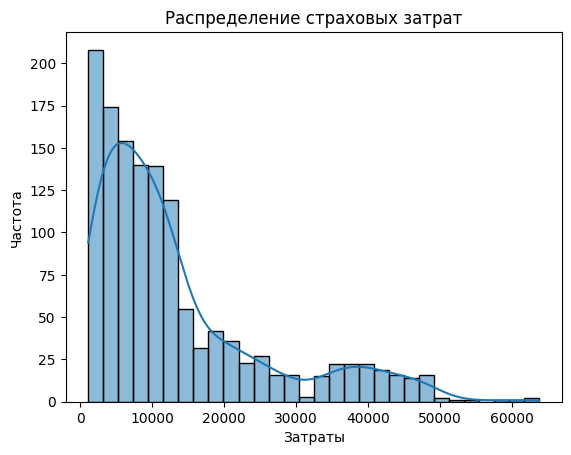

In [97]:
sns.histplot(df['charges'], kde=True)
plt.title('Распределение страховых затрат')
plt.xlabel('Затраты')
plt.ylabel('Частота')
plt.show()

### Зависимость charges от age и bmi:

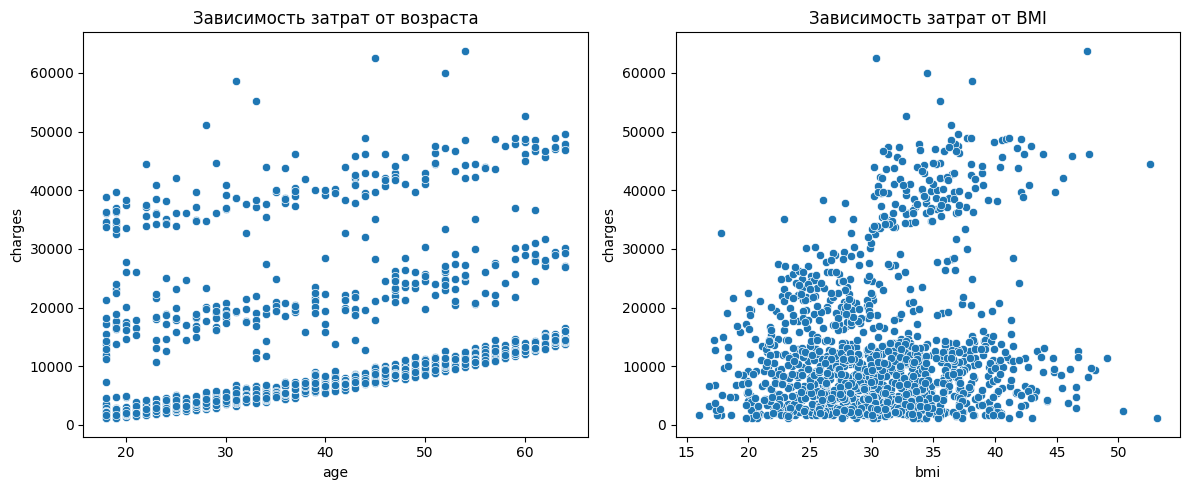

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x='age', y='charges', data=df, ax=axes[0])
sns.scatterplot(x='bmi', y='charges', data=df, ax=axes[1])
axes[0].set_title('Зависимость затрат от возраста')
axes[1].set_title('Зависимость затрат от BMI')
plt.tight_layout()
plt.show()

### Корреляционная матрица после кодирования:

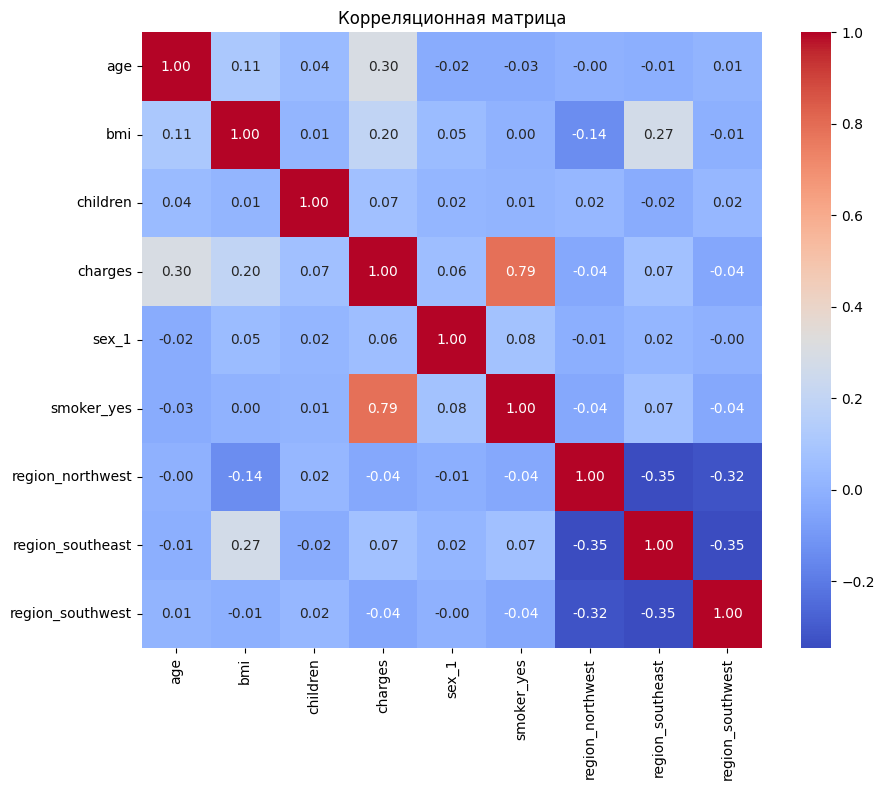

In [99]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()